# Lagrange Interpolation

In [15]:
import numpy as np

Generate the weights for our barycentric lagrange interpolation.

In [ ]:
def LagrangeInterpolate(xs):
    n = len(xs)
    ws = []
    for i in range(n):
        prod=1
        for j in range(n):
            if j == i:
                continue
            prod = prod * (xs[i]-xs[j])
            
        ws.append(1/prod)

    return(np.array(ws))

Evaluate our barycentric lagrange polynomial.

In [17]:
def evalBarycentricLagrange(xs,fs,ws,z):

    

    # here, we build the matrix of differences, where the rows index the zs 
    # and the columns index the xs
    diffs = z[:, None] - xs[None, :]

    # here, we keep track of where our differneces were zero. we will want to fill these
    # entries in fz with the correct function val f_i at the end
    zeros = np.isclose(diffs, 0.0, atol=1e-10)

    # take 1/diffs; if this would blow up, set to 0
    recip_diffs = np.where(zeros, 0.0, 1.0 / diffs)

    # get differences summed over the xs for a given z value via [None,:]
    num = np.sum((fs *ws)[None,:] * recip_diffs, axis=1, keepdims=True)
    denom = np.sum(ws[None,:]* recip_diffs,axis=1, keepdims=True)
    fz = num / denom

    # if z[i] was not an xj, and  diffs[i,j] is nonzero, so zeros[i,j] = False
    # z[i] = x[j] for i != j, then again diffs[i,j] != 0
    # only when z[i] = x[j] is diffs[i,j] = 0; hence, 
    # zeros[i,j] corresponds to the ith index of fz needing to be set to fs[j]

    rows, cols = np.where(zeros)
    if rows.size:
        fz[rows, 0] = fs[cols]
    return fz



Here, we adjust our weights by adding another interpolation point.

In [ ]:
def update_barycentric_weights(wsOld,xsOld,xNew):
    if np.any(np.isclose(xsOld, xNew, atol=1.e-10)):
        # print("Point is non-unique in list.\n")
        # return 0
        raise ValueError(f"Your point {xNew} matches an old point. ")

    # update the old weights
    dif = xsOld - xNew
    wsNew = wsOld/dif

    # calculate the new weight
    prod=1
    for j in range(len(xsOld)):
        prod = prod * (xNew-xsOld[j])
    wFinal=(1/prod)
    
    wsNew = np.concatenate((wsNew,[wFinal]))


    return(wsNew)

Here, we test our interpolation on the functions below.

In [19]:
import matplotlib.pyplot as plt

In [20]:
def Exp(x):
    return(np.exp(-x**2))
def Sin(x):
    return(np.sin(2*x))
def Poly(x):
    return(x+x**2+x**3+x**4+x**5+x**6+x**7)

In [21]:
def get_interp_points(a,b,npoints,f):
    # input the bounds of an interval [a,b] on which you wish to interpolate, 
    # the number of interpolation points
    # and the function to interpolate

    # outputs the pair of vectors (points,function values)
    xs = np.linspace(a,b,npoints)
    fs = f(xs)
    return(xs,fs)


# master function
def plot_f_vs_interp(a,b,list_of_ns,f,fname=''):
    xs_plot = np.linspace(a,b,1000)
    fs_plot = f(xs_plot)
    for n in list_of_ns:
        xs,fs = get_interp_points(a,b,n,f)
        ws = LagrangeInterpolate(xs)
        fs_interp_plot = evalBarycentricLagrange(xs,fs,ws,xs_plot)
        plt.plot(xs_plot,fs_interp_plot,label=f'Interpolating with {n} points.')
    plt.plot(xs_plot,fs_plot,'--b',label=fname)

    plt.title(f'Barycentric Lagrange Interpolation of {fname}.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()




<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_25982/1615044432.py:2: SyntaxWarning: invalid escape sequence '\m'
  plot_f_vs_interp(-2,4,[5,10,20],Sin,fname='$\mathrm{sin}(2x)$')
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_25982/1615044432.py:3: SyntaxWarning: invalid escape sequence '\s'
  plot_f_vs_interp(-2,4,[5,10,20],Poly,fname='$\sum_{i=1}^7 x^i$')
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_25982/1771646991.py:14: RuntimeWarning: divide by zero encountered in divide
  recip_diffs = np.where(zeros, 0.0, 1.0 / diffs)


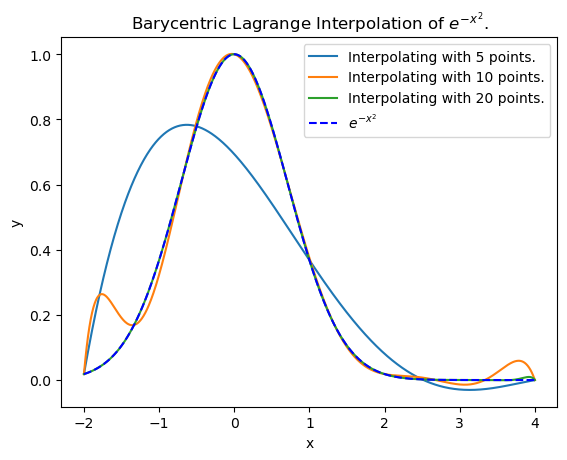

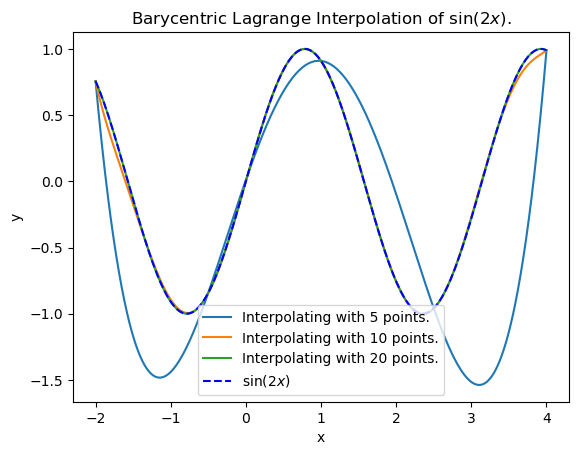

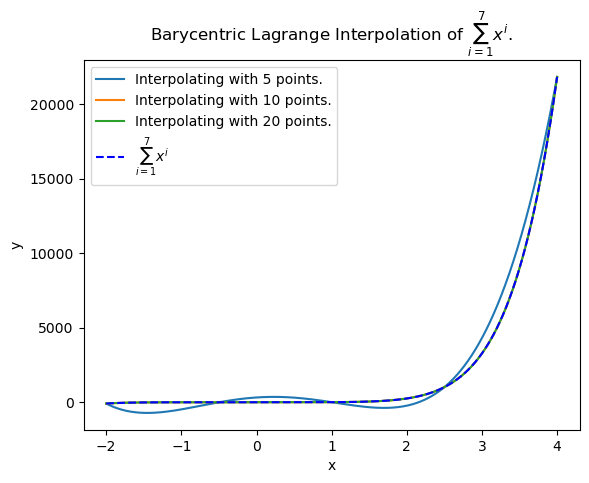

In [22]:
plot_f_vs_interp(-2,4,[5,10,20],Exp,fname='$e^{-x^2}$')
plot_f_vs_interp(-2,4,[5,10,20],Sin,fname='$\mathrm{sin}(2x)$')
plot_f_vs_interp(-2,4,[5,10,20],Poly,fname='$\sum_{i=1}^7 x^i$')